# Import Library

In [1]:
import numpy as np
import math
import natsort
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob

from PIL import Image

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

# Data Loder

In [2]:
dir_path = os.getenv("HOME") + '/Cloud_data'

In [3]:
Atrous_unet_model_path = dir_path + '/cloud_model/seg_atrous_unet_model_sliding800.h5'

In [4]:
Atrous_unet_model = tf.keras.models.load_model(Atrous_unet_model_path)

# Test 

In [151]:
def calculate_iou_score(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    #print(union)
    
    if float(np.sum(union)) == 0:
        return 0
    
    
    iou_score = float(np.sum(intersection)) / float(np.sum(union))
    
#     print('IoU : %f' % iou_score )
    return iou_score

In [34]:
def get_output(model, image_path, output_path, label_path):
    
    origin_img = cv2.imread(image_path)
        
    output = model(np.expand_dims(origin_img/255, axis=0))
    output = (output[0].numpy()>=0.5).astype(np.uint8).squeeze(-1)*255
    prediction = output/255   # 구름으로 판단한 영역
    
    output = Image.fromarray(output)
    background = Image.fromarray(origin_img).convert('RGBA')
    output = output.resize((origin_img.shape[1], origin_img.shape[0])).convert('RGBA')
    output = Image.blend(background, output, alpha=0.5)
    
    
   
    if label_path:   
        label_img = cv2.imread(label_path,0)
        target = (label_img == 50).astype(np.uint8)*1   # 라벨에서 짙은구름으로 기재된 영역

        return output, prediction, target
    else:
        return output, prediction, _

---

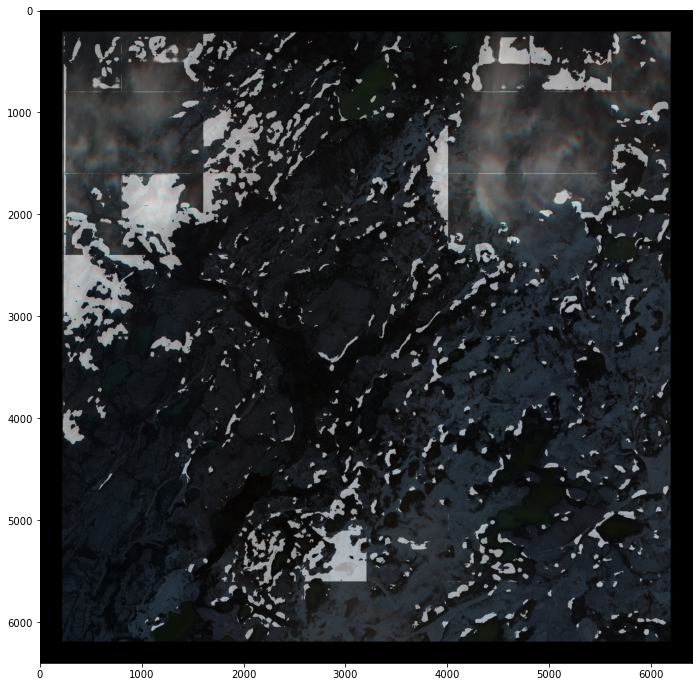

0.08402993779034305


In [156]:
img_num = 1
seg_result_list = []
iou_avg = 0
test_dir_path = dir_path + '/cloud_validation'
none_0 = 64


for j in range(64):
    i = img_num
    j = j+1
    output, prediction, target = get_output(
         Atrous_unet_model, 
         image_path = test_dir_path + f'/zero_patch_img/img{i}_{j}.png',
         output_path = test_dir_path + f'/output_test/img{i}_{j}.png',
         label_path = test_dir_path + f'/patch_labeling800/img{i}_{j}.png'
     )
    
    output = np.array(output)
    seg_result_list.append(output)
    
    if calculate_iou_score(target, prediction) == 0:
        none_0 -= 1
    iou_avg += calculate_iou_score(target, prediction)

    
combine_img2 = np.empty((1,6400,4), dtype=np.uint8) 
for i in range(8):
    combine_img = np.empty((800,1))
    combine_img = seg_result_list[i*8]

    for k in range(1,8):
        combine_img = np.hstack((combine_img, seg_result_list[i*8+k]))
    combine_img2 = np.vstack((combine_img2, combine_img))

plt.figure(figsize = (12,12))
plt.imshow(combine_img2); plt.show()

print(iou_avg/none_0)
    

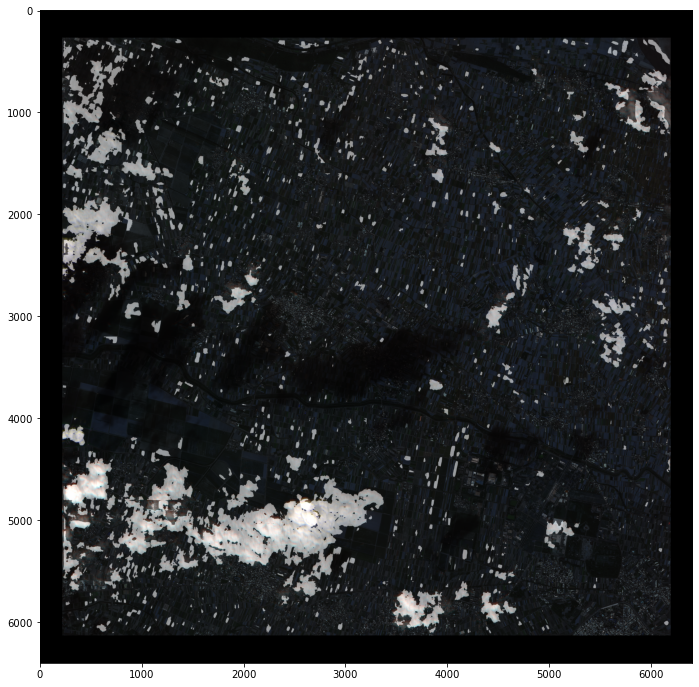

0.03476077510376201


In [153]:
img_num = 2
seg_result_list = []
iou_avg = 0
test_dir_path = dir_path + '/cloud_validation'

for j in range(64):
    i = img_num
    j = j+1
    output, prediction, target = get_output(
         Atrous_unet_model, 
         image_path = test_dir_path + f'/zero_patch_img/img{i}_{j}.png',
         output_path = test_dir_path + f'/output_test/img{i}_{j}.png',
         label_path = test_dir_path + f'/patch_labeling800/img{i}_{j}.png'
     )
    
    output = np.array(output)
    seg_result_list.append(output)
    iou_avg += calculate_iou_score(target, prediction)

    
combine_img2 = np.empty((1,6400,4), dtype=np.uint8) 
for i in range(8):
    combine_img = np.empty((800,1))
    combine_img = seg_result_list[i*8]

    for k in range(1,8):
        combine_img = np.hstack((combine_img, seg_result_list[i*8+k]))
    combine_img2 = np.vstack((combine_img2, combine_img))

plt.figure(figsize = (12,12))
plt.imshow(combine_img2); plt.show()

print(iou_avg/64)
    

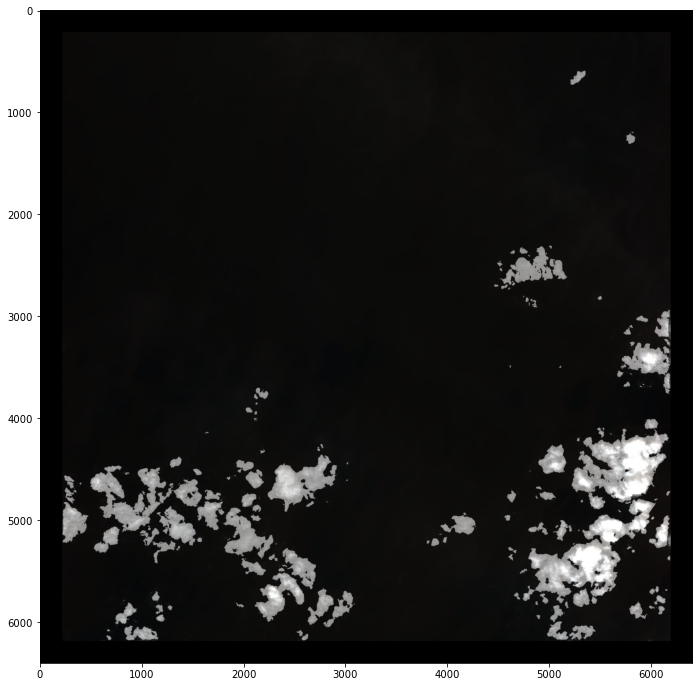

0.15310931722780113


In [157]:
img_num = 3
seg_result_list = []
iou_avg = 0
test_dir_path = dir_path + '/cloud_validation'
none_0 = 64


for j in range(64):
    i = img_num
    j = j+1
    output, prediction, target = get_output(
         Atrous_unet_model, 
         image_path = test_dir_path + f'/zero_patch_img/img{i}_{j}.png',
         output_path = test_dir_path + f'/output_test/img{i}_{j}.png',
         label_path = test_dir_path + f'/patch_labeling800/img{i}_{j}.png'
     )
    
    output = np.array(output)
    seg_result_list.append(output)
    
    if calculate_iou_score(target, prediction) == 0:
        none_0 -= 1
    iou_avg += calculate_iou_score(target, prediction)

    
combine_img2 = np.empty((1,6400,4), dtype=np.uint8) 
for i in range(8):
    combine_img = np.empty((800,1))
    combine_img = seg_result_list[i*8]

    for k in range(1,8):
        combine_img = np.hstack((combine_img, seg_result_list[i*8+k]))
    combine_img2 = np.vstack((combine_img2, combine_img))

plt.figure(figsize = (12,12))
plt.imshow(combine_img2); plt.show()

print(iou_avg/none_0)
    

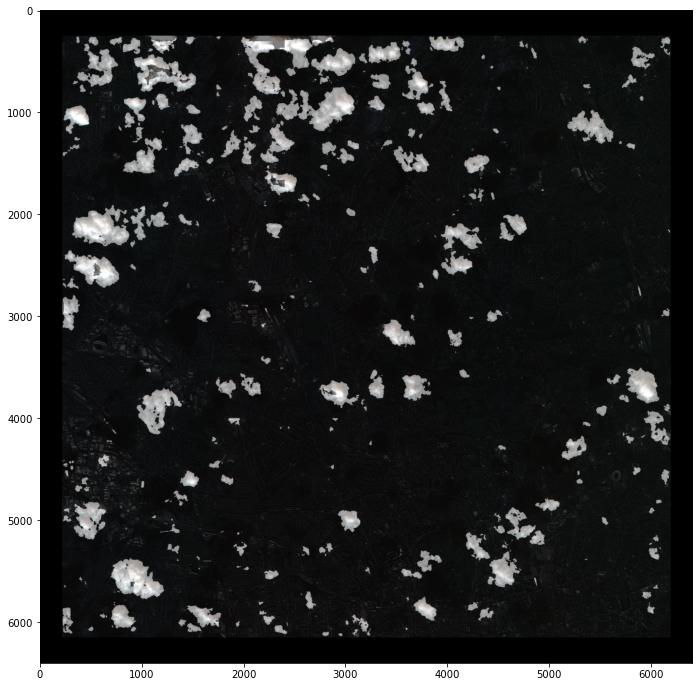

0.05451344415554022


In [158]:
img_num = 4
seg_result_list = []
iou_avg = 0
test_dir_path = dir_path + '/cloud_validation'
none_0 = 64


for j in range(64):
    i = img_num
    j = j+1
    output, prediction, target = get_output(
         Atrous_unet_model, 
         image_path = test_dir_path + f'/zero_patch_img/img{i}_{j}.png',
         output_path = test_dir_path + f'/output_test/img{i}_{j}.png',
         label_path = test_dir_path + f'/patch_labeling800/img{i}_{j}.png'
     )
    
    output = np.array(output)
    seg_result_list.append(output)
    
    if calculate_iou_score(target, prediction) == 0:
        none_0 -= 1
    iou_avg += calculate_iou_score(target, prediction)

    
combine_img2 = np.empty((1,6400,4), dtype=np.uint8) 
for i in range(8):
    combine_img = np.empty((800,1))
    combine_img = seg_result_list[i*8]

    for k in range(1,8):
        combine_img = np.hstack((combine_img, seg_result_list[i*8+k]))
    combine_img2 = np.vstack((combine_img2, combine_img))

plt.figure(figsize = (12,12))
plt.imshow(combine_img2); plt.show()

print(iou_avg/none_0)
    